## Visualizing Filters of a Convolutional Neural Network

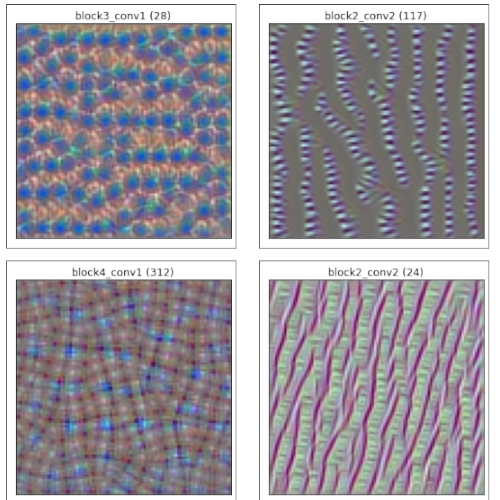

## Task 2: Downloading the Model

In [1]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

print('Tensorflow version', tf.__version__)

Tensorflow version 2.8.2


In [2]:
model = tf.keras.applications.vgg16.VGG16(
    include_top=False,  # not include FC layer
    weights='imagenet',
    input_shape=(96, 96, 3)
)
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 48, 48, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 48, 48, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 48, 48, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 24, 24, 128)       0     

## Task 3: Get Layer Output

In [3]:
def get_submodel(layer_name):
  return tf.keras.models.Model(
            model.input,
            model.get_layer(layer_name).output
  )

get_submodel('block1_conv2').summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 96, 96, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 96, 96, 64)        36928     
                                                                 
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


## Task 4: Image Visualization

In [4]:
def create_image():
  return tf.random.uniform((96, 96, 3), minval=-0.5, maxval=0.5)

def plt_image(image, title='random'):
  image = image - tf.math.reduce_min(image)
  image = image / tf.math.reduce_max(image)
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title(title)
  plt.show()

In [5]:
from google.colab import files
from keras.preprocessing import image
import numpy as np

def my_upload_image():
  uploaded=files.upload()

  for fn in uploaded.keys():
    # predicting images
    path='/content/' + fn
    img = image.load_img(path, target_size=(96, 96))
    img = np.array(img)
    return tf.Variable(img)

# image = my_upload_image()
# plt_image(image)

Saving csail-mit.jpg to csail-mit (4).jpg


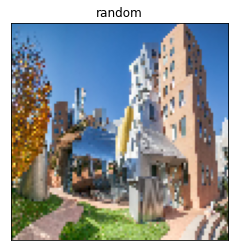

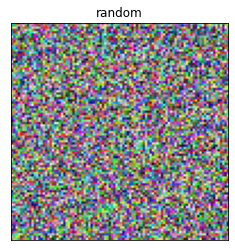

In [6]:
image = my_upload_image()
plt_image(image)

image = create_image()
plt_image(image)

## Task 5: Training Loop

In [7]:
def visualize_filter(layer_name, isUpload=False, filter_idx=None, iters=50):
  submodel = get_submodel(layer_name)
  num_filters = submodel.output.shape[-1]

  if filter_idx is None:
    filter_idx = random.randint(0, num_filters-1)
  assert num_filters > filter_idx, 'filter_index is out of bounds'

  image = create_image()
  if isUpload: image = my_upload_image()
  verbose_step = int(iters/10.0)

  for i in range(iters):
    with tf.GradientTape() as tape:
      tape.watch(image)
      out = submodel(tf.expand_dims(image, axis=0))[:, :, :, filter_idx]  # shape = (batch, h, w, c)
      loss = tf.math.reduce_mean(out)
    grads = tape.gradient(loss, image)
    grads = tf.math.l2_normalize(grads)
    image += grads * 10

    if (i+1) % verbose_step == 0:
      print(f'iteration: {i+1} -- loss: {loss.numpy():.4f}')
  
  plt_image(image, f'{layer_name}-{filter_idx}')

## Task 6: Final Results

In [8]:
print([layer.name for layer in model.layers if 'conv' in layer.name])

['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']


iteration: 5 -- loss: 0.4634
iteration: 10 -- loss: 0.7657
iteration: 15 -- loss: 1.0685
iteration: 20 -- loss: 1.3715
iteration: 25 -- loss: 1.6748
iteration: 30 -- loss: 1.9783
iteration: 35 -- loss: 2.2819
iteration: 40 -- loss: 2.5856
iteration: 45 -- loss: 2.8894
iteration: 50 -- loss: 3.1932


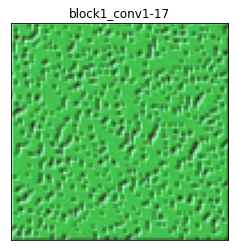

In [9]:
layer_name = 'block1_conv1' #@param ['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']

visualize_filter(layer_name, isUpload=False)

In [10]:
layer_name = 'block5_conv2' #@param ['block1_conv1', 'block1_conv2', 'block2_conv1', 'block2_conv2', 'block3_conv1', 'block3_conv2', 'block3_conv3', 'block4_conv1', 'block4_conv2', 'block4_conv3', 'block5_conv1', 'block5_conv2', 'block5_conv3']

visualize_filter(layer_name, isUpload=True)

Saving csail-mit.jpg to csail-mit (5).jpg


AttributeError: ignored